In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# extracting the Zip File
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
with_masks_files = os.listdir('/content/data/with_mask')
print(with_masks_files[0:5])
print(len(with_masks_files))

['with_mask_311.jpg', 'with_mask_811.jpg', 'with_mask_1414.jpg', 'with_mask_1119.jpg', 'with_mask_1431.jpg']
3725


In [8]:
without_masks_files = os.listdir('/content/data/without_mask')
print(len(without_masks_files))
print(without_masks_files[0:5])

3828
['without_mask_1117.jpg', 'without_mask_631.jpg', 'without_mask_615.jpg', 'without_mask_1141.jpg', 'without_mask_2063.jpg']


In [9]:
# making labels for the dataset
import numpy as np

with_masks_labels = [1]*3725
without_masks_labels = [0]*3828


In [10]:
 labels = with_masks_labels + without_masks_labels
 print(len(labels))

7553


In [11]:
print(labels[0:10])
print(labels[-6:])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]


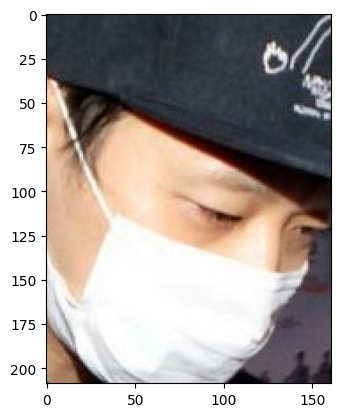

In [12]:
# displaying mask image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('/content/data/with_mask/with_mask_98.jpg')
imgplot = plt.imshow(img)
plt.show()

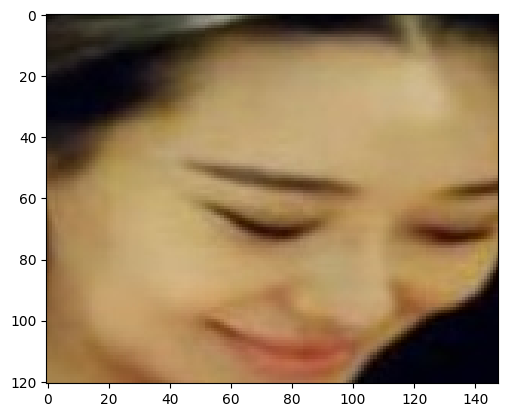

In [13]:
# images without masks

img = mpimg.imread('/content/data/without_mask/without_mask_3274.jpg')
img_plot = plt.imshow(img)
plt.show()


IMAGE PROCESSING

1. IMAGE RESIZE
2. CONVERTING IN NUMPY ARRAY



In [14]:
# coverting images to numpy array
from PIL import Image
import numpy as np

with_masks_path = ('/content/data/with_mask/')

data = []

for img_file in with_masks_files:

  image = Image.open(  with_masks_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_masks_path = ('/content/data/without_mask/')



for img_file in without_masks_files:

  image = Image.open( without_masks_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7553

In [17]:
x = np.array(data)
y = np.array(labels)

In [18]:
x.shape

(7553, 128, 128, 3)

In [19]:
type(x)

numpy.ndarray

In [20]:
type(y)

numpy.ndarray

In [21]:
print(y)
print(x[0])

[1 1 1 ... 0 0 0]
[[[158 115  80]
  [158 116  81]
  [153 114  78]
  ...
  [146 100  48]
  [143  95  40]
  [134  84  31]]

 [[160 117  82]
  [159 117  82]
  [153 114  78]
  ...
  [142  97  46]
  [144  96  44]
  [139  89  39]]

 [[161 117  82]
  [156 114  79]
  [151 112  75]
  ...
  [140  96  49]
  [142  94  45]
  [142  94  45]]

 ...

 [[129 109  76]
  [128 108  75]
  [127 106  73]
  ...
  [187 170 140]
  [145 120  90]
  [117  87  59]]

 [[129 109  76]
  [128 108  75]
  [129 107  74]
  ...
  [182 163 132]
  [125 100  69]
  [110  81  53]]

 [[129 109  76]
  [127 107  74]
  [129 108  75]
  ...
  [176 157 126]
  [118  92  61]
  [115  85  57]]]


In [22]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x, y , test_size = 0.2 , random_state = 2 )

In [23]:
print(x_train.shape)

(6042, 128, 128, 3)


In [24]:
print(x_test.shape)

(1511, 128, 128, 3)


In [25]:
# scaling of data

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [26]:
print(x_test_scaled[1])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [27]:
 # CNN model

 import tensorflow as tf
 from tensorflow import keras
 from keras import layers
 from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
 from keras.models import Sequential

In [28]:
 model = Sequential()

 model.add( Conv2D (32 , kernel_size = (3,3) , activation='relu' , input_shape = (128,128,3)))
 model.add( MaxPooling2D(2,2))

 model.add( Conv2D( 64 , kernel_size = (3,3) ,   activation= 'relu' , input_shape = (128,128,3)) )
 model.add( MaxPooling2D(2,2))

 model.add( Flatten())

 model.add( Dense( 128 , activation = 'relu'))
 model.add( Dropout(0.5))

 model.add( Dense( 64 , activation = 'relu'))
 model.add( Dropout(0.5))


 model.add( Dense( 2 , activation = 'sigmoid'))


In [29]:
# COMPILING THE Neural Network

model.compile( optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics= ['acc'])

In [30]:
# Training the Neural Network

history = model.fit( x_train_scaled , y_train , validation_split = 0.1 , epochs = 5)

Epoch 1/5
170/170 [==============================] - 156s 890ms/step - loss: 0.4834 - acc: 0.8028 - val_loss: 0.2588 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 139s 818ms/step - loss: 0.3028 - acc: 0.8828 - val_loss: 0.2520 - val_acc: 0.9008
Epoch 3/5
170/170 [==============================] - 141s 827ms/step - loss: 0.2434 - acc: 0.9099 - val_loss: 0.2348 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 142s 836ms/step - loss: 0.2228 - acc: 0.9152 - val_loss: 0.1888 - val_acc: 0.9289
Epoch 5/5
170/170 [==============================] - 142s 834ms/step - loss: 0.1688 - acc: 0.9360 - val_loss: 0.1596 - val_acc: 0.9306


MODEL EVALUATION

In [31]:
loss,accuracy = model.evaluate(x_test_scaled , y_test)
print('Accuracy = ' , accuracy)

48/48 [==============================] - 10s 212ms/step - loss: 0.1910 - acc: 0.9272
Accuracy =  0.9272005558013916


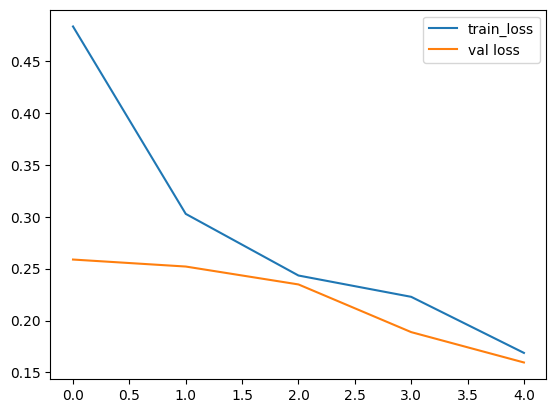

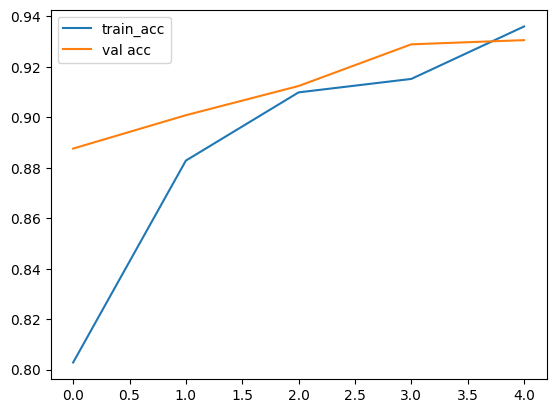

In [32]:
h = history
#plot for Loss

plt.plot(h.history['loss'] , label = 'train_loss' )
plt.plot(h.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()

#plot for Accuracy

plt.plot(h.history['acc'] , label = 'train_acc')
plt.plot(h.history['val_acc'] , label= 'val acc')
plt.legend()
plt.show()

input image to be predicted :/content/Kurta pic.jpg


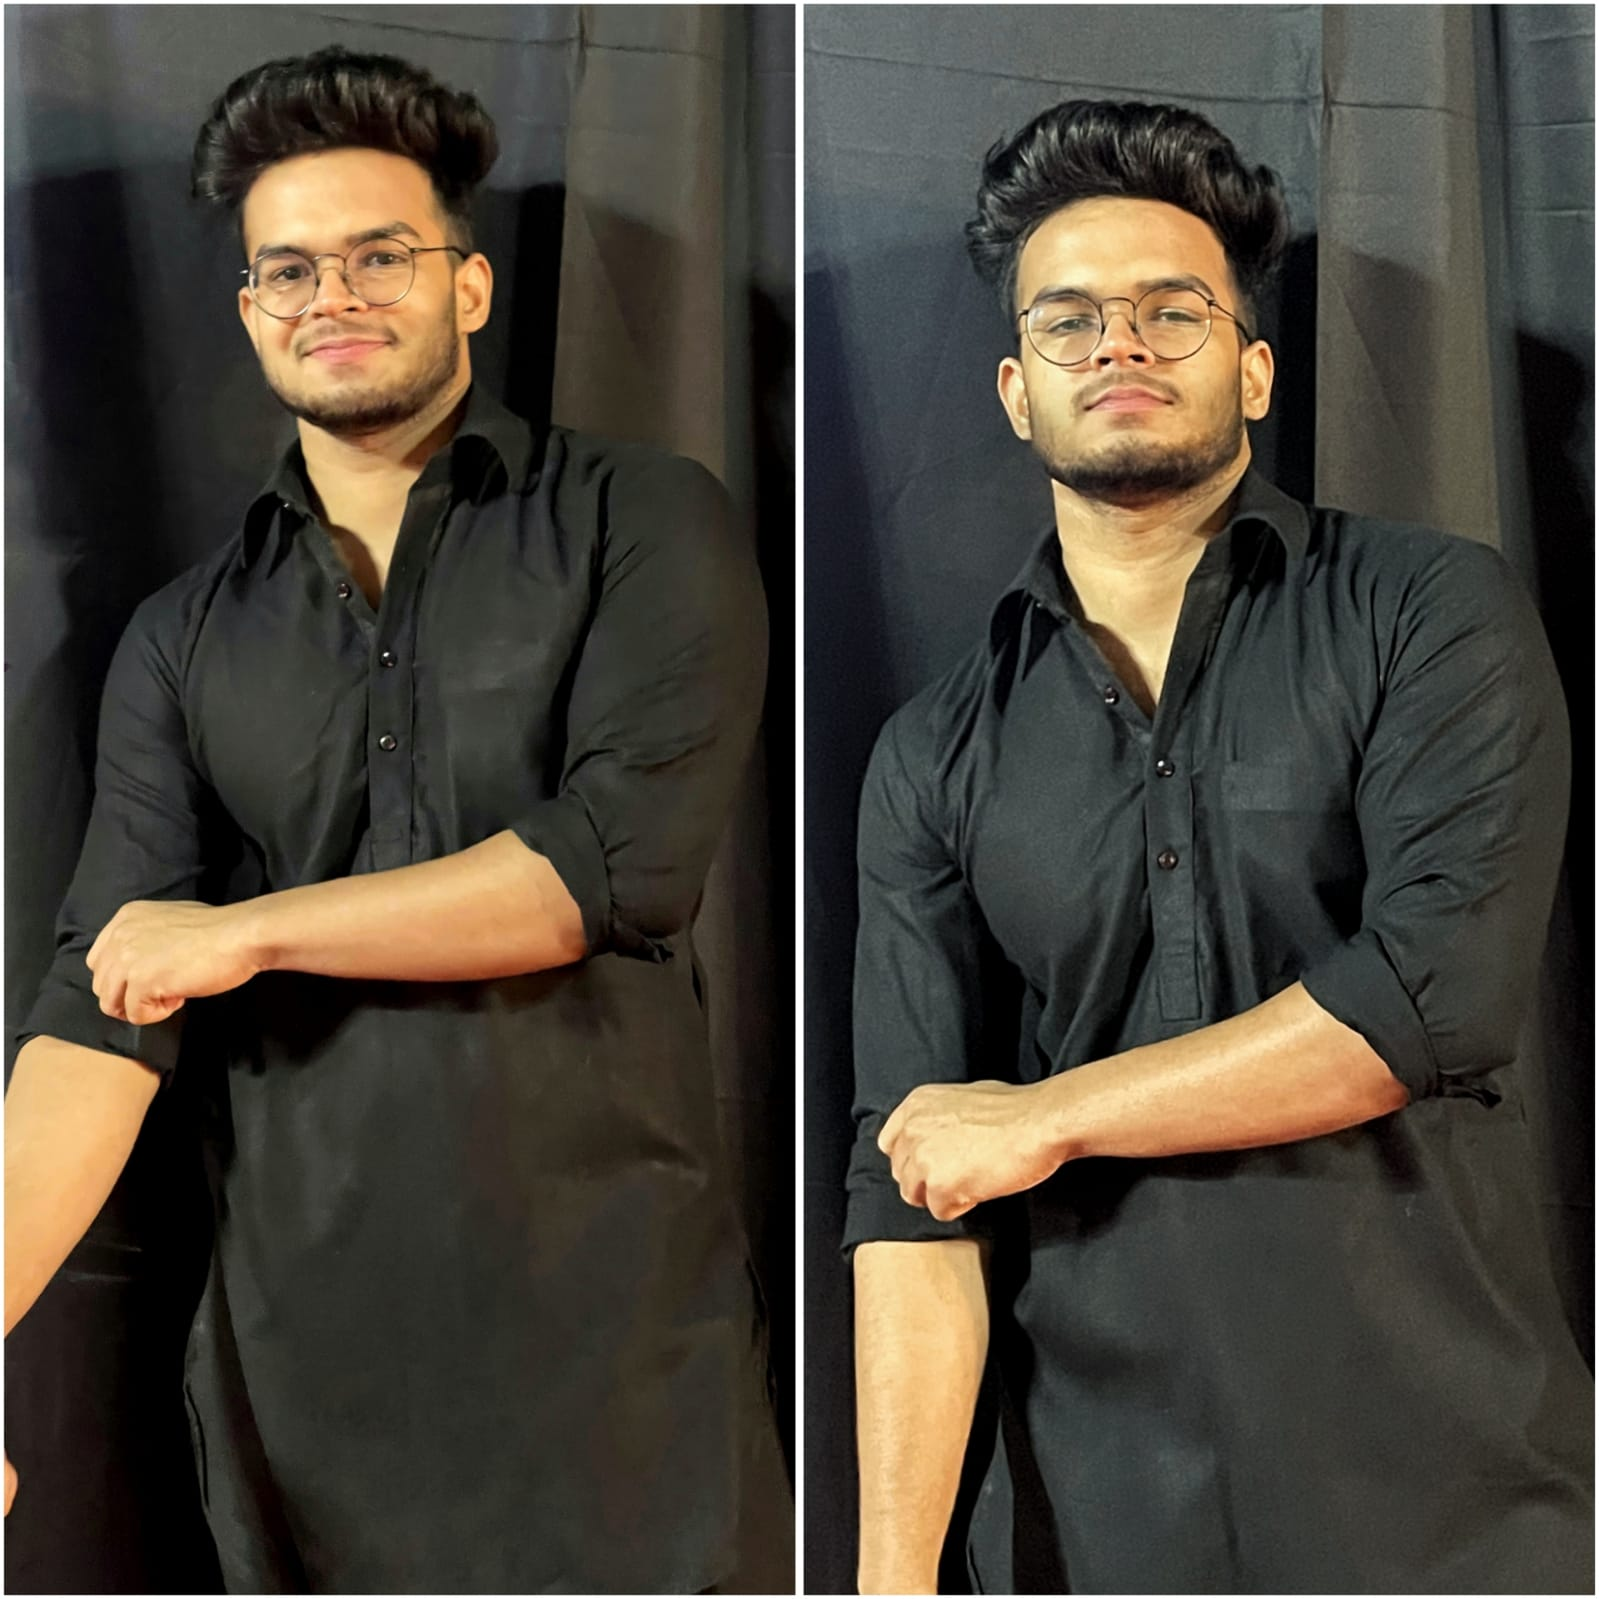

1/1 [==============================] - 0s 49ms/step
[[0.20151752 0.9109107 ]]
1
the person is wearing a mask


In [35]:
  # PREDICTIVE SYSTEM
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image_path = input('input image to be predicted :')

input_image = cv2.imread(image_path)

cv2_imshow(input_image )

image_resized = cv2.resize(input_image , (128,128))

image_scaled = image_resized/255

image_reshaped = np.reshape(image_scaled, (1 , 128 , 128 , 3))

input_prediction = model.predict(image_reshaped)

print(input_prediction)
5
pred_label = np.argmax(input_prediction)
print(pred_label)

if pred_label == 1:

    print('the person is wearing a mask')

else :

 print('the person is not wearing a mask')